# Carga de datos

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Tweets.csv")

In [3]:
df.head(3).T

,0,1,2
tweet_id,570306133677760513,570301130888122368,570301083672813571
airline_sentiment,neutral,positive,neutral
airline_sentiment_confidence,1.0,0.3486,0.6837
negativereason,NaN,NaN,NaN
negativereason_confidence,NaN,0.0,NaN
airline,Virgin America,Virgin America,Virgin America
airline_sentiment_gold,NaN,NaN,NaN
name,cairdin,jnardino,yvonnalynn
negativereason_gold,NaN,NaN,NaN
retweet_count,0,0,0


In [4]:
df.shape

(14640, 15)

In [5]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

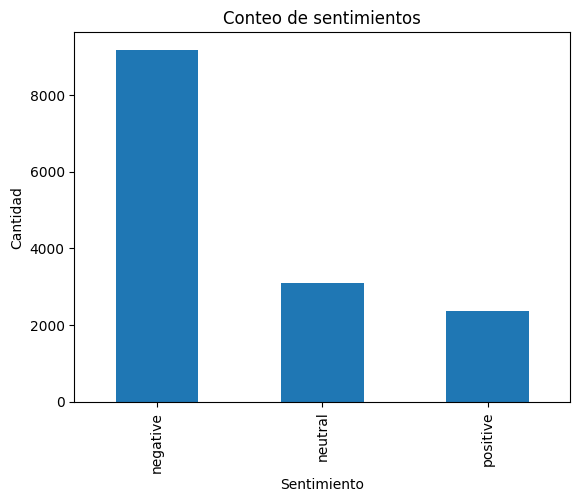

In [6]:
sentiment_counts = df['airline_sentiment'].value_counts()

sentiment_counts.plot(kind='bar')
plt.title('Conteo de sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

In [7]:
df['airline_sentiment'].value_counts(normalize=True)

airline_sentiment
negative    0.626913
neutral     0.211680
positive    0.161407
Name: proportion, dtype: float64

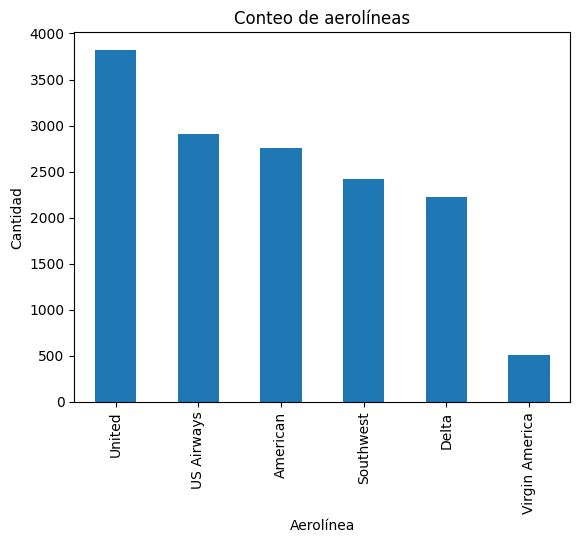

In [8]:
airline_count = df['airline'].value_counts()

airline_count.plot(kind='bar')
plt.title('Conteo de aerolíneas')
plt.xlabel('Aerolínea')
plt.ylabel('Cantidad')
plt.show()

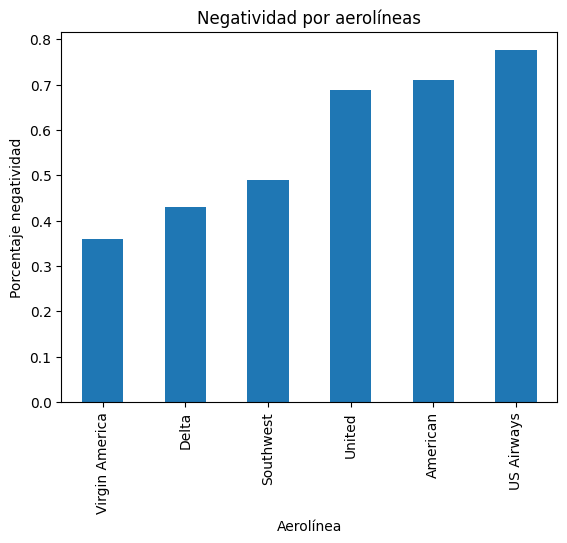

In [9]:
df['is_negative'] = df['airline_sentiment'] == "negative"

mean_negative = df.groupby("airline")['is_negative'].mean().sort_values()

mean_negative.plot(kind='bar')
plt.title('Negatividad por aerolíneas')
plt.xlabel('Aerolínea')
plt.ylabel('Porcentaje negatividad')
plt.show()

In [10]:
df['airline_sentiment'].values[:3]

array(['neutral', 'positive', 'neutral'], dtype=object)

In [11]:
df['text'].values[1:6]

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it",
       "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA"],
      dtype=object)

In [12]:
df['text'].values[50:]

array(['@VirginAmerica Is flight 769 on it\'s way? Was supposed to take off 30 minutes ago. Website still shows "On Time" not "In Flight". Thanks.',
       '@VirginAmerica @ladygaga @carrieunderwood Julie Andrews all the way though @ladygaga was very impressive! NO to @Carrieunderwood',
       '@VirginAmerica wish you flew out of Atlanta... Soon?', ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

### Preprocesamiento del texto

Algunos tweets de ejemplo que aparecen son los siguientes:

@VirginAmerica plus you've added commercials to the experience... tacky.

@VirginAmerica What @dhepburn said.

@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA

@AmericanAir Please bring American Airlines to #BlackBerry10

@VirginAmerica View of downtown Los Angeles, the Hollywood Sign, and beyond that rain in the mountains! http://t.co/Dw5nf0ibtr

En estos textos vemos que algunas palabras son simplemente etiquetados de tweeter, hashtags, links y también hay caracteres innecesarios como triple puntos suspensivos entre otros. Nuestro primer trabajo de limpieza será la eliminación de los mismos

In [13]:
def proccess_tweet(tweet):
    tweet = tweet.lower() #minúsculas
    tweet = tweet.replace(" RT ","") #sacamos los RT
    tweet = tweet.replace("!","") #Sacamos los !
    tweet_words = tweet.split() 
    tweet_words = [x for x in tweet_words if not x.startswith("@")] #eliminar etiquetas
    tweet_words = [x for x in tweet_words if not x.startswith("http")] #enlaces fuera
    tweet_words = [x for x in tweet_words if not ("&" in x and "#" in x)] # todo lo que tenga & y #m, fuera
    tweet = " ".join(tweet_words) #reunimos
    tweet = re.sub("[^a-zA-Z0-9']"," ",tweet) #sacamos símbolos raros
    return tweet

In [14]:
df['text_clean'] = df['text'].apply(proccess_tweet)

In [15]:
df['text'].values[:3]

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!"],
      dtype=object)

In [16]:
df['text_clean'].values[:3]

array(['what said ',
       "plus you've added commercials to the experience    tacky ",
       "i didn't today    must mean i need to take another trip"],
      dtype=object)

Vemos el resultado de la limpieza de inmediato, los tweets se han liberado de los trozos de texto no necesarios.

### División de los datos

Vamos a dividir nuestros datos en entrenamiento, validación y testeo.

Vamos a utilizar estratificación también para asegurarnos balanceo, aunque seguramente no haría tanta falta

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df['text_clean'], df['airline_sentiment'], 
                                                            test_size=0.15, 
                                                            random_state=42, 
                                                            stratify=df['airline_sentiment'])

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

In [20]:
len(y_train), len(y_val), len(y_test)

(9955, 2489, 2196)

## Preprocesamiento. Count vectorizer

In [21]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
count_vec = CountVectorizer()
bow = count_vec.fit_transform(X_train)
bow = np.array(bow.todense())

# MODELOS

### Naive Bayes Model

In [23]:
model = MultinomialNB().fit(bow, y_train)

In [24]:
y_pred = model.predict(count_vec.transform(X_test))

### Resultados

In [25]:
print(f"Acc is: {np.mean(y_pred == y_test)}")

Acc is: 0.7682149362477231


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.77      0.96      0.86      1377
     neutral       0.70      0.39      0.50       465
    positive       0.83      0.51      0.63       354

    accuracy                           0.77      2196
   macro avg       0.77      0.62      0.66      2196
weighted avg       0.76      0.77      0.74      2196



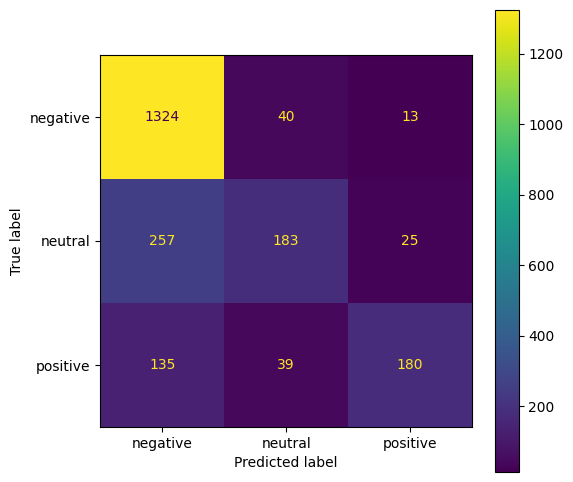

In [27]:
fig, ax = plt.subplots(nrows=1, figsize=(6, 6))
ax.grid(False)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels = sorted(set(y_test))).plot(cmap="viridis", ax=ax)

## Random forest classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(n_estimators=200, bootstrap=True, criterion='gini', max_depth=50, random_state=0)
rf.fit(bow, y_train)

RandomForestClassifier(max_depth=50, n_estimators=200, random_state=0)

In [30]:
y_pred = rf.predict(count_vec.transform(X_test))

### Resultados

In [31]:
print(f"Acc is: {np.mean(y_pred == y_test)}")

Acc is: 0.7090163934426229


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.69      0.99      0.82      1377
     neutral       0.85      0.14      0.24       465
    positive       0.87      0.35      0.50       354

    accuracy                           0.71      2196
   macro avg       0.81      0.49      0.52      2196
weighted avg       0.76      0.71      0.64      2196



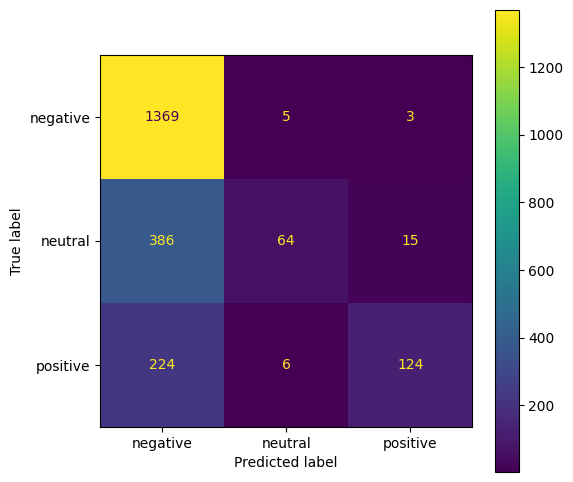

In [33]:
fig, ax = plt.subplots(nrows=1, figsize=(6, 6))
ax.grid(False)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels = sorted(set(y_test))).plot(cmap="viridis", ax=ax)

# SVM + Lematization

### Preprocesamiento

In [34]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [35]:
lemma = WordNetLemmatizer()
swords = stopwords.words("english")

In [36]:
def clean_data(list_of_words):
    return_list = []
    for text in list_of_words:
        text = re.sub("[^a-zA-Z0-9]"," ",text)
        text = nltk.word_tokenize(text)
        text = [lemma.lemmatize(word) for word in text]
        text = [word for word in text if word not in swords]
        text = " ".join(text)
        return_list.append(text)
    return return_list

In [37]:
new_X_train = clean_data(X_train)

In [38]:
vectorizer = CountVectorizer(max_features=10000)

BOW = vectorizer.fit_transform(new_X_train)

### Modelo

In [39]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(BOW,y_train)

SVC()

In [40]:
new_X_test = clean_data(X_test)

In [41]:
BOW_test = vectorizer.transform(new_X_test)

### Resultados

In [42]:
y_pred = svc_model.predict(BOW_test)

In [43]:
print(f"Acc is: {np.mean(y_pred == y_test)}")

Acc is: 0.7709471766848816


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1377
     neutral       0.62      0.55      0.58       465
    positive       0.77      0.51      0.61       354

    accuracy                           0.77      2196
   macro avg       0.73      0.66      0.69      2196
weighted avg       0.76      0.77      0.76      2196



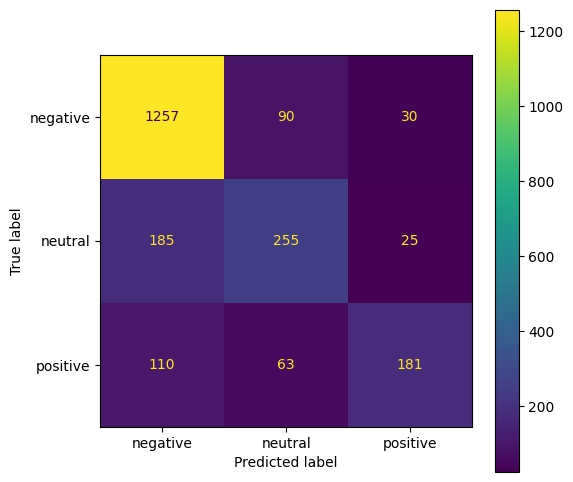

In [45]:
fig, ax = plt.subplots(nrows=1, figsize=(6, 6))
ax.grid(False)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels = sorted(set(y_test))).plot(cmap="viridis", ax=ax)

### Embeddings tipo glove + deep learning

### Procesamiento de datos

In [52]:
import os
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras.utils import pad_sequences

In [47]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train.values)

vocab_size = len(tokenizer.word_index) + 1

In [48]:
embeddings_index = {}

with open(os.path.join('glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32') 
        embeddings_index[word] = embedding

In [49]:
embedding_dim = 100

word_index = tokenizer.word_index
nb_words = min(vocab_size, len(word_index) + 1)

embedding_matrix = np.zeros((nb_words, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector

In [50]:
X_train_keras = tokenizer.texts_to_sequences(X_train)
X_val_keras = tokenizer.texts_to_sequences(X_val)
X_test_keras = tokenizer.texts_to_sequences(X_test)

In [53]:
maxlen = 100

X_train_keras = pad_sequences(X_train_keras, padding='post', maxlen=maxlen)
X_val_keras = pad_sequences(X_val_keras, padding='post', maxlen=maxlen)
X_test_keras = pad_sequences(X_test_keras, padding='post', maxlen=maxlen)

In [54]:
mapping = {x:idx for idx, x in enumerate(sorted(set(y_train)))}
inverse_mapping = {idx:x for idx, x in enumerate(sorted(set(y_train)))}

In [55]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train.map(mapping).values, 3)
y_val_one_hot = tf.keras.utils.to_categorical(y_val.map(mapping).values, 3)

### Deep Learning

In [75]:
from keras.models import Sequential
from keras import layers

from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D, Bidirectional, LSTM, Dropout
from keras.models import Sequential
from keras.utils import pad_sequences
from keras.metrics import categorical_accuracy

In [76]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [80]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen,
                            weights = [embedding_matrix], 
                            trainable = True))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1088900   
                                                                 
 conv1d_6 (Conv1D)           (None, 98, 128)           38528     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 32, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 30, 128)           49280     
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 10, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_8 (Conv1D)           (None, 8, 128)           

In [ ]:
history = model.fit(X_train_keras, y_train_one_hot,
                    epochs=40,
                    verbose=True,
                    validation_data=(X_val_keras, y_val_one_hot),
                    batch_size=10)

In [82]:
y_pred = model.predict(X_test_keras)

69/69 [==============================] - 0s 6ms/step


In [83]:
y_pred = np.argmax(y_pred, axis = 1)

### Resultados

In [84]:
y_pred = np.array([inverse_mapping[x] for x in y_pred])

In [85]:
print(f"Acc is: {np.mean(y_pred == y_test)}")

Acc is: 0.779143897996357


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      1377
     neutral       0.59      0.62      0.60       465
    positive       0.70      0.70      0.70       354

    accuracy                           0.78      2196
   macro avg       0.72      0.72      0.72      2196
weighted avg       0.78      0.78      0.78      2196



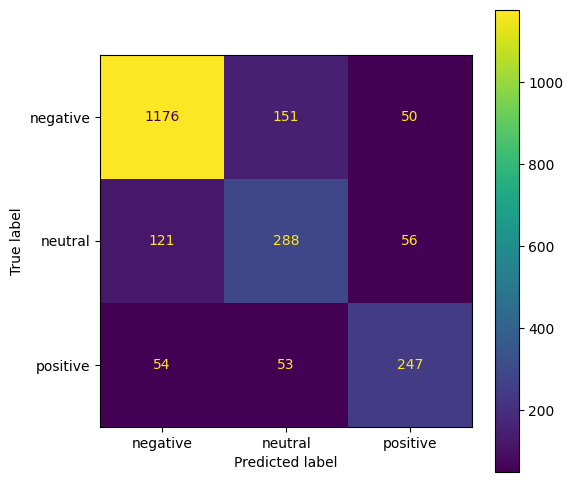

In [87]:
fig, ax = plt.subplots(nrows=1, figsize=(6, 6))
ax.grid(False)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels = sorted(set(y_test))).plot(cmap="viridis", ax=ax)

### Comparar resultados

In [68]:
import matplotlib.pyplot as plt

In [88]:
model_results = {
"Bayes" : 0.7682,

"Random_Forest": 0.7090,

"SVM" : 0.7709,

"Glove_CNN" : 0.778
}

<Axes: >

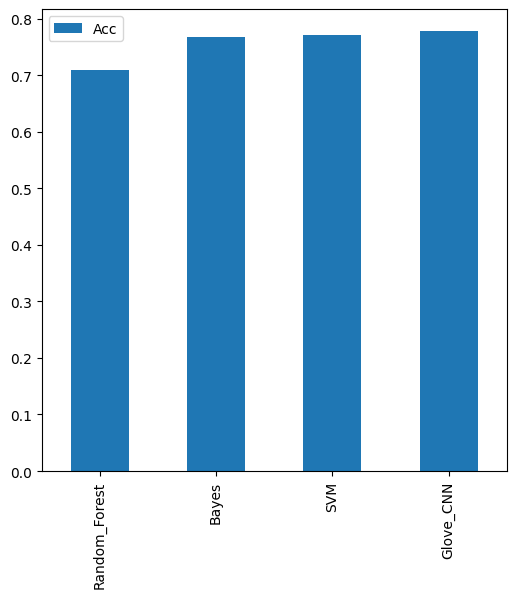

In [89]:
fig, ax = plt.subplots(figsize=(6, 6))
pd.DataFrame(model_results.values(), index = model_results.keys(), columns = ["Acc"]).sort_values(by="Acc").plot.bar(ax=ax)